## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              88.73
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   7.10e-108
Time:                        10:42:09   Log-Likelihood:                         -292.59
No. Observations:                 404   AIC:                                      611.2
Df Residuals:                     391   BIC:                                      663.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

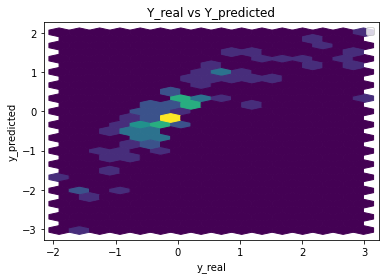

Performance Metrics
Mean Squared Error: 0.30978609592012163
Mean Absolute Error: 0.3821025028527096
Manhattan distance: 38.97445529097639
Euclidean distance: 5.621226003627002


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.1730171845216125


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 0.9763319	total: 58.5ms	remaining: 58.5s
1:	learn: 0.9556123	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9362929	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9187757	total: 61.4ms	remaining: 15.3s
4:	learn: 0.9017023	total: 62.4ms	remaining: 12.4s
5:	learn: 0.8843708	total: 63.3ms	remaining: 10.5s
6:	learn: 0.8694549	total: 64.2ms	remaining: 9.11s
7:	learn: 0.8543988	total: 65.2ms	remaining: 8.09s
8:	learn: 0.8389420	total: 66.1ms	remaining: 7.28s
9:	learn: 0.8242162	total: 67ms	remaining: 6.63s
10:	learn: 0.8091843	total: 68ms	remaining: 6.11s
11:	learn: 0.7952746	total: 68.8ms	remaining: 5.67s
12:	learn: 0.7816991	total: 69.6ms	remaining: 5.28s
13:	learn: 0.7664018	total: 70.5ms	remaining: 4.96s
14:	learn: 0.7536039	total: 72.1ms	remaining: 4.73s
15:	learn: 0.7392366	total: 72.9ms	remaining: 4.49s
16:	learn: 0.7266067	total: 73.9ms	remaining: 4.27s
17:	learn: 0.7141968	total: 74.7ms	remaining: 4.08s
18:	learn: 0.7010158	total: 75.4ms	remaining: 3.9s
19:	learn: 0.6888816	total:

120:	learn: 0.2811364	total: 158ms	remaining: 1.15s
121:	learn: 0.2799972	total: 159ms	remaining: 1.15s
122:	learn: 0.2786773	total: 160ms	remaining: 1.14s
123:	learn: 0.2778222	total: 161ms	remaining: 1.14s
124:	learn: 0.2768017	total: 162ms	remaining: 1.13s
125:	learn: 0.2755952	total: 162ms	remaining: 1.13s
126:	learn: 0.2742623	total: 163ms	remaining: 1.12s
127:	learn: 0.2733111	total: 164ms	remaining: 1.12s
128:	learn: 0.2719514	total: 165ms	remaining: 1.11s
129:	learn: 0.2703942	total: 166ms	remaining: 1.11s
130:	learn: 0.2694787	total: 166ms	remaining: 1.1s
131:	learn: 0.2686095	total: 167ms	remaining: 1.1s
132:	learn: 0.2676877	total: 168ms	remaining: 1.09s
133:	learn: 0.2663709	total: 169ms	remaining: 1.09s
134:	learn: 0.2651146	total: 170ms	remaining: 1.09s
135:	learn: 0.2641089	total: 170ms	remaining: 1.08s
136:	learn: 0.2632620	total: 171ms	remaining: 1.08s
137:	learn: 0.2624955	total: 172ms	remaining: 1.07s
138:	learn: 0.2614682	total: 172ms	remaining: 1.07s
139:	learn: 0.

162:	learn: 0.2426896	total: 193ms	remaining: 989ms
163:	learn: 0.2420592	total: 193ms	remaining: 985ms
164:	learn: 0.2414774	total: 194ms	remaining: 983ms
165:	learn: 0.2410609	total: 195ms	remaining: 980ms
166:	learn: 0.2402587	total: 196ms	remaining: 977ms
167:	learn: 0.2392128	total: 197ms	remaining: 974ms
168:	learn: 0.2386751	total: 198ms	remaining: 971ms
169:	learn: 0.2380390	total: 198ms	remaining: 968ms
170:	learn: 0.2373145	total: 199ms	remaining: 966ms
171:	learn: 0.2367780	total: 200ms	remaining: 963ms
172:	learn: 0.2360782	total: 201ms	remaining: 960ms
173:	learn: 0.2353540	total: 202ms	remaining: 958ms
174:	learn: 0.2346679	total: 203ms	remaining: 955ms
175:	learn: 0.2338685	total: 203ms	remaining: 952ms
176:	learn: 0.2332498	total: 204ms	remaining: 949ms
177:	learn: 0.2324408	total: 205ms	remaining: 946ms
178:	learn: 0.2318937	total: 206ms	remaining: 943ms
179:	learn: 0.2312216	total: 206ms	remaining: 940ms
180:	learn: 0.2303408	total: 208ms	remaining: 940ms
181:	learn: 

229:	learn: 0.2038785	total: 247ms	remaining: 828ms
230:	learn: 0.2033857	total: 248ms	remaining: 827ms
231:	learn: 0.2028595	total: 249ms	remaining: 825ms
232:	learn: 0.2023879	total: 250ms	remaining: 823ms
233:	learn: 0.2019980	total: 251ms	remaining: 821ms
234:	learn: 0.2015179	total: 252ms	remaining: 819ms
235:	learn: 0.2010027	total: 252ms	remaining: 817ms
236:	learn: 0.2003036	total: 253ms	remaining: 815ms
237:	learn: 0.1997279	total: 254ms	remaining: 813ms
238:	learn: 0.1989772	total: 255ms	remaining: 811ms
239:	learn: 0.1986666	total: 255ms	remaining: 809ms
240:	learn: 0.1981039	total: 256ms	remaining: 807ms
241:	learn: 0.1976351	total: 257ms	remaining: 806ms
242:	learn: 0.1968875	total: 258ms	remaining: 804ms
243:	learn: 0.1964935	total: 259ms	remaining: 802ms
244:	learn: 0.1958144	total: 260ms	remaining: 800ms
245:	learn: 0.1955499	total: 261ms	remaining: 799ms
246:	learn: 0.1949504	total: 261ms	remaining: 797ms
247:	learn: 0.1946780	total: 262ms	remaining: 795ms
248:	learn: 

351:	learn: 0.1592851	total: 349ms	remaining: 642ms
352:	learn: 0.1589938	total: 350ms	remaining: 641ms
353:	learn: 0.1586214	total: 350ms	remaining: 639ms
354:	learn: 0.1581519	total: 351ms	remaining: 638ms
355:	learn: 0.1579641	total: 352ms	remaining: 637ms
356:	learn: 0.1575921	total: 353ms	remaining: 636ms
357:	learn: 0.1571731	total: 354ms	remaining: 634ms
358:	learn: 0.1570619	total: 354ms	remaining: 633ms
359:	learn: 0.1567619	total: 355ms	remaining: 631ms
360:	learn: 0.1563349	total: 356ms	remaining: 630ms
361:	learn: 0.1560609	total: 357ms	remaining: 629ms
362:	learn: 0.1556953	total: 358ms	remaining: 628ms
363:	learn: 0.1552911	total: 358ms	remaining: 626ms
364:	learn: 0.1550559	total: 359ms	remaining: 625ms
365:	learn: 0.1546256	total: 360ms	remaining: 624ms
366:	learn: 0.1542590	total: 361ms	remaining: 623ms
367:	learn: 0.1540696	total: 362ms	remaining: 622ms
368:	learn: 0.1539105	total: 363ms	remaining: 620ms
369:	learn: 0.1536064	total: 364ms	remaining: 619ms
370:	learn: 

392:	learn: 0.1472932	total: 382ms	remaining: 591ms
393:	learn: 0.1472171	total: 383ms	remaining: 590ms
394:	learn: 0.1471045	total: 384ms	remaining: 588ms
395:	learn: 0.1469962	total: 385ms	remaining: 587ms
396:	learn: 0.1466357	total: 386ms	remaining: 586ms
397:	learn: 0.1465794	total: 386ms	remaining: 585ms
398:	learn: 0.1462287	total: 387ms	remaining: 583ms
399:	learn: 0.1458553	total: 388ms	remaining: 582ms
400:	learn: 0.1454593	total: 389ms	remaining: 581ms
401:	learn: 0.1452929	total: 390ms	remaining: 580ms
402:	learn: 0.1450502	total: 390ms	remaining: 578ms
403:	learn: 0.1446731	total: 391ms	remaining: 577ms
404:	learn: 0.1446314	total: 392ms	remaining: 576ms
405:	learn: 0.1442780	total: 393ms	remaining: 575ms
406:	learn: 0.1439547	total: 393ms	remaining: 573ms
407:	learn: 0.1437195	total: 394ms	remaining: 572ms
408:	learn: 0.1434355	total: 395ms	remaining: 571ms
409:	learn: 0.1432047	total: 396ms	remaining: 570ms
410:	learn: 0.1431611	total: 397ms	remaining: 568ms
411:	learn: 

461:	learn: 0.1309763	total: 438ms	remaining: 510ms
462:	learn: 0.1307350	total: 439ms	remaining: 509ms
463:	learn: 0.1305980	total: 440ms	remaining: 508ms
464:	learn: 0.1303453	total: 441ms	remaining: 507ms
465:	learn: 0.1302254	total: 442ms	remaining: 506ms
466:	learn: 0.1299169	total: 443ms	remaining: 505ms
467:	learn: 0.1296822	total: 444ms	remaining: 504ms
468:	learn: 0.1294058	total: 444ms	remaining: 503ms
469:	learn: 0.1291499	total: 445ms	remaining: 502ms
470:	learn: 0.1289289	total: 446ms	remaining: 501ms
471:	learn: 0.1286136	total: 447ms	remaining: 500ms
472:	learn: 0.1283734	total: 448ms	remaining: 499ms
473:	learn: 0.1281110	total: 448ms	remaining: 498ms
474:	learn: 0.1279164	total: 449ms	remaining: 497ms
475:	learn: 0.1276452	total: 450ms	remaining: 496ms
476:	learn: 0.1275179	total: 452ms	remaining: 495ms
477:	learn: 0.1273908	total: 453ms	remaining: 495ms
478:	learn: 0.1273644	total: 454ms	remaining: 494ms
479:	learn: 0.1271577	total: 455ms	remaining: 492ms
480:	learn: 

582:	learn: 0.1061206	total: 539ms	remaining: 386ms
583:	learn: 0.1059129	total: 540ms	remaining: 385ms
584:	learn: 0.1057395	total: 541ms	remaining: 384ms
585:	learn: 0.1055350	total: 542ms	remaining: 383ms
586:	learn: 0.1053062	total: 543ms	remaining: 382ms
587:	learn: 0.1051250	total: 543ms	remaining: 381ms
588:	learn: 0.1049796	total: 544ms	remaining: 380ms
589:	learn: 0.1048620	total: 545ms	remaining: 379ms
590:	learn: 0.1046955	total: 546ms	remaining: 378ms
591:	learn: 0.1044986	total: 547ms	remaining: 377ms
592:	learn: 0.1044388	total: 547ms	remaining: 376ms
593:	learn: 0.1042189	total: 548ms	remaining: 375ms
594:	learn: 0.1041215	total: 549ms	remaining: 374ms
595:	learn: 0.1039314	total: 550ms	remaining: 373ms
596:	learn: 0.1037794	total: 551ms	remaining: 372ms
597:	learn: 0.1035857	total: 552ms	remaining: 371ms
598:	learn: 0.1034879	total: 552ms	remaining: 370ms
599:	learn: 0.1032975	total: 553ms	remaining: 369ms
600:	learn: 0.1031683	total: 554ms	remaining: 368ms
601:	learn: 

623:	learn: 0.1001293	total: 573ms	remaining: 345ms
624:	learn: 0.0998925	total: 574ms	remaining: 344ms
625:	learn: 0.0997913	total: 575ms	remaining: 343ms
626:	learn: 0.0996615	total: 575ms	remaining: 342ms
627:	learn: 0.0995165	total: 576ms	remaining: 341ms
628:	learn: 0.0993563	total: 577ms	remaining: 340ms
629:	learn: 0.0992978	total: 578ms	remaining: 339ms
630:	learn: 0.0991100	total: 579ms	remaining: 338ms
631:	learn: 0.0989326	total: 580ms	remaining: 337ms
632:	learn: 0.0987417	total: 580ms	remaining: 336ms
633:	learn: 0.0985469	total: 581ms	remaining: 335ms
634:	learn: 0.0982429	total: 582ms	remaining: 335ms
635:	learn: 0.0980892	total: 583ms	remaining: 334ms
636:	learn: 0.0980193	total: 584ms	remaining: 333ms
637:	learn: 0.0978521	total: 584ms	remaining: 332ms
638:	learn: 0.0976457	total: 585ms	remaining: 331ms
639:	learn: 0.0976299	total: 586ms	remaining: 330ms
640:	learn: 0.0974992	total: 587ms	remaining: 329ms
641:	learn: 0.0973842	total: 587ms	remaining: 328ms
642:	learn: 

691:	learn: 0.0891317	total: 629ms	remaining: 280ms
692:	learn: 0.0890229	total: 630ms	remaining: 279ms
693:	learn: 0.0889199	total: 631ms	remaining: 278ms
694:	learn: 0.0887894	total: 631ms	remaining: 277ms
695:	learn: 0.0887623	total: 632ms	remaining: 276ms
696:	learn: 0.0886035	total: 633ms	remaining: 275ms
697:	learn: 0.0884884	total: 634ms	remaining: 274ms
698:	learn: 0.0883053	total: 635ms	remaining: 273ms
699:	learn: 0.0881815	total: 635ms	remaining: 272ms
700:	learn: 0.0880546	total: 636ms	remaining: 271ms
701:	learn: 0.0879028	total: 637ms	remaining: 270ms
702:	learn: 0.0877666	total: 638ms	remaining: 270ms
703:	learn: 0.0876437	total: 639ms	remaining: 269ms
704:	learn: 0.0875714	total: 640ms	remaining: 268ms
705:	learn: 0.0873851	total: 640ms	remaining: 267ms
706:	learn: 0.0872319	total: 641ms	remaining: 266ms
707:	learn: 0.0870621	total: 642ms	remaining: 265ms
708:	learn: 0.0869262	total: 643ms	remaining: 264ms
709:	learn: 0.0868454	total: 644ms	remaining: 263ms
710:	learn: 

814:	learn: 0.0742814	total: 729ms	remaining: 166ms
815:	learn: 0.0741367	total: 730ms	remaining: 165ms
816:	learn: 0.0740452	total: 731ms	remaining: 164ms
817:	learn: 0.0739426	total: 732ms	remaining: 163ms
818:	learn: 0.0738229	total: 733ms	remaining: 162ms
819:	learn: 0.0737259	total: 733ms	remaining: 161ms
820:	learn: 0.0735743	total: 734ms	remaining: 160ms
821:	learn: 0.0734601	total: 735ms	remaining: 159ms
822:	learn: 0.0733556	total: 736ms	remaining: 158ms
823:	learn: 0.0732004	total: 737ms	remaining: 157ms
824:	learn: 0.0731245	total: 738ms	remaining: 156ms
825:	learn: 0.0731053	total: 738ms	remaining: 156ms
826:	learn: 0.0730656	total: 739ms	remaining: 155ms
827:	learn: 0.0730342	total: 740ms	remaining: 154ms
828:	learn: 0.0729071	total: 741ms	remaining: 153ms
829:	learn: 0.0728045	total: 742ms	remaining: 152ms
830:	learn: 0.0727197	total: 743ms	remaining: 151ms
831:	learn: 0.0726234	total: 743ms	remaining: 150ms
832:	learn: 0.0725447	total: 744ms	remaining: 149ms
833:	learn: 

854:	learn: 0.0705214	total: 763ms	remaining: 129ms
855:	learn: 0.0703828	total: 764ms	remaining: 129ms
856:	learn: 0.0703277	total: 765ms	remaining: 128ms
857:	learn: 0.0702069	total: 766ms	remaining: 127ms
858:	learn: 0.0701611	total: 767ms	remaining: 126ms
859:	learn: 0.0700496	total: 767ms	remaining: 125ms
860:	learn: 0.0699438	total: 768ms	remaining: 124ms
861:	learn: 0.0698374	total: 769ms	remaining: 123ms
862:	learn: 0.0697639	total: 770ms	remaining: 122ms
863:	learn: 0.0696545	total: 771ms	remaining: 121ms
864:	learn: 0.0695651	total: 772ms	remaining: 120ms
865:	learn: 0.0694984	total: 773ms	remaining: 120ms
866:	learn: 0.0693651	total: 773ms	remaining: 119ms
867:	learn: 0.0692591	total: 774ms	remaining: 118ms
868:	learn: 0.0691663	total: 775ms	remaining: 117ms
869:	learn: 0.0690716	total: 776ms	remaining: 116ms
870:	learn: 0.0688885	total: 777ms	remaining: 115ms
871:	learn: 0.0688008	total: 778ms	remaining: 114ms
872:	learn: 0.0687157	total: 779ms	remaining: 113ms
873:	learn: 

922:	learn: 0.0643244	total: 819ms	remaining: 68.3ms
923:	learn: 0.0642556	total: 820ms	remaining: 67.4ms
924:	learn: 0.0641660	total: 821ms	remaining: 66.6ms
925:	learn: 0.0640843	total: 823ms	remaining: 65.8ms
926:	learn: 0.0640234	total: 824ms	remaining: 64.9ms
927:	learn: 0.0639486	total: 825ms	remaining: 64ms
928:	learn: 0.0638467	total: 825ms	remaining: 63.1ms
929:	learn: 0.0637040	total: 826ms	remaining: 62.2ms
930:	learn: 0.0635357	total: 827ms	remaining: 61.3ms
931:	learn: 0.0635202	total: 828ms	remaining: 60.4ms
932:	learn: 0.0634231	total: 829ms	remaining: 59.5ms
933:	learn: 0.0633276	total: 829ms	remaining: 58.6ms
934:	learn: 0.0632028	total: 830ms	remaining: 57.7ms
935:	learn: 0.0631130	total: 831ms	remaining: 56.8ms
936:	learn: 0.0630359	total: 832ms	remaining: 55.9ms
937:	learn: 0.0629781	total: 833ms	remaining: 55ms
938:	learn: 0.0629208	total: 834ms	remaining: 54.1ms
939:	learn: 0.0628908	total: 834ms	remaining: 53.3ms
940:	learn: 0.0628057	total: 835ms	remaining: 52.4

## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 1.1179756590568213
